MetPy Declarative - 300 hPa
===========================

By: Kevin Goebbert

This example uses the declarative syntax available through the MetPy
package to allow a more convenient method for creating simple maps of
atmospheric data. The key thing the declarative language does is to
reduce the number of packages that users will need to know in detail and
instead allow them to set key parameters to get the map they desire. One
key element is the use of xarray as the data object, which allows
coordinate information to be associated with atmospheric variables.

In [1]:
from datetime import datetime

import metpy.calc as mpcalc
from metpy.plots.declarative import *
from metpy.units import units
import xarray as xr

Open dataset using xarray module and subset global GFS to be over the
CONUS.


In [2]:
ds = xr.open_dataset('https://thredds.ucar.edu/thredds/dodsC/casestudies'
                     '/python-gallery/GFS_20101026_1200.nc').sel(
    lon=slice(360-150, 360-50, 2), lat=slice(65, 20, 2))

Calculate Variable and Add to Dataset
-------------------------------------

Here it is demonstrated how you can calculate a new variable and add it
to the xarray dataset (ds) so that it can be plotted with the
declarative syntax. The key to adding a variable to an xarray dataset
for use in the declarative syntax is the need to add a ``grid_mapping``
and ``units`` attribute.


In [3]:
# Calculate New Variables and place into Xarray Dataset
uwnd = ds['u-component_of_wind_isobaric']
vwnd = ds['v-component_of_wind_isobaric']

# Compute wind speed using MetPy
wspd = mpcalc.wind_speed(uwnd, vwnd)

# Place wind speed (wspd) into xarray dataset and attach needed attributes
ds['wind_speed'] = wspd

Declarative Plot
----------------

The following settings create a single panel map plot of 300 hPa
geopotential heights, wind speed, and wind barbs.


Could not find variable corresponding to the value of grid_mapping: LatLon_Projection
Could not find variable corresponding to the value of grid_mapping: LatLon_Projection
Could not find variable corresponding to the value of grid_mapping: LatLon_Projection
/Users/kgoebber/miniconda3/envs/main/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/kgoebber/miniconda3/envs/main/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/kgoebber/miniconda3/envs/main/lib/python3.11/site-packages/shapely/predicates.py:688: RuntimeWarning: invalid value encountered in covers
  return lib.covers(a, b, **kwargs)
/Users/kgoebber/miniconda3/envs/main/lib/python3.11/site-packages/shapely/predicates.py:730: RuntimeWarning: invalid value encountered in disjoint
  return lib.disjoint(a, b, **kwargs)
/Users/kgoebber/min

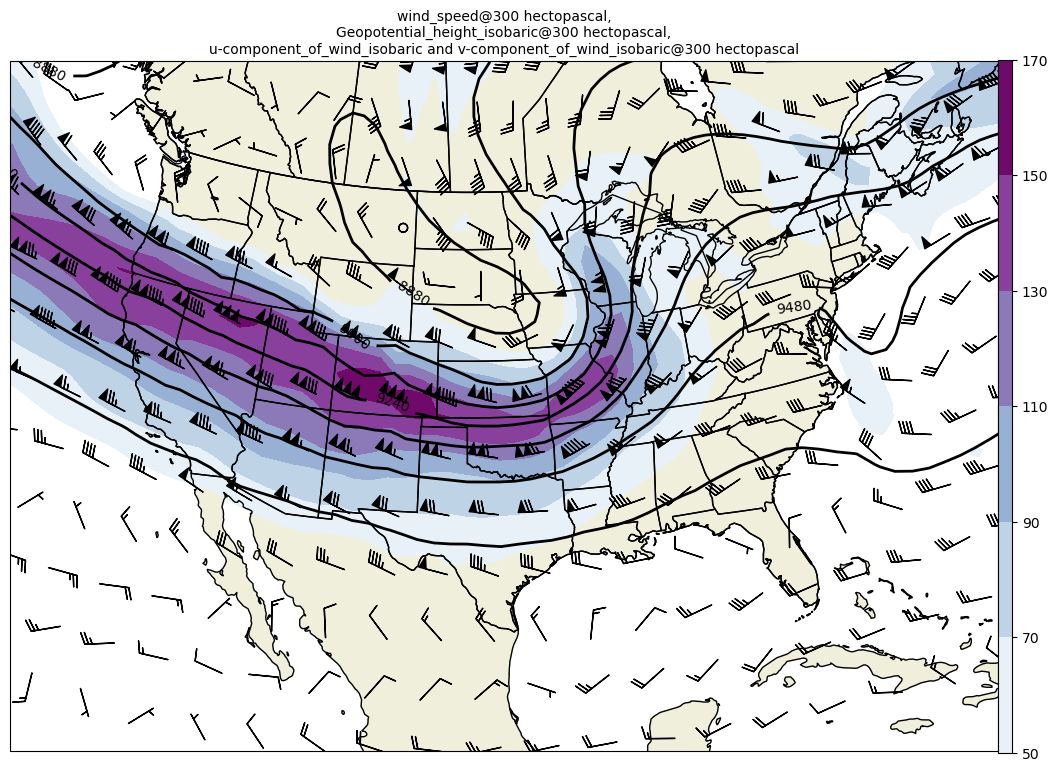

In [4]:
# Countour Plot of Geopotential Heights
contour = ContourPlot()
contour.data = ds
contour.time = datetime(2010, 10, 31, 12)
contour.field = 'Geopotential_height_isobaric'
contour.level = 300 * units.hPa
contour.linecolor = 'black'
contour.linestyle = '-'
contour.linewidth = 2
contour.clabels = True
contour.contours = list(range(0, 20000, 120))

# Colorfilled Plot of Wind Speed
cfill = FilledContourPlot()
cfill.data = ds
cfill.field = 'wind_speed'
cfill.level = 300 * units.hPa
cfill.colormap = 'BuPu'
cfill.contours = list(range(50, 171, 20))
cfill.colorbar = 'vertical'
cfill.plot_units = 'kt'

# Plot wind barbs
barb = BarbPlot()
barb.data = ds
barb.level = 300 * units.hPa
barb.field = ['u-component_of_wind_isobaric', 'v-component_of_wind_isobaric']
barb.skip = (3, 3)
barb.color = 'black'
barb.barblength = 6.5
barb.earth_relative = False
barb.plot_units = 'kt'

# Panel for plot with Map features
panel = MapPanel()
panel.layout = (1, 1, 1)
panel.area = (-124, -72, 20, 53)
panel.projection = 'lcc'
panel.layers = ['coastline', 'borders', 'states', 'land']
panel.plots = [cfill, contour, barb]

# Bringing it all together
pc = PanelContainer()
pc.size = (15, 9)
pc.panels = [panel]

pc.show()